# import libs

In [2]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.14.0'

# Data Processing

## Image augmentation

In [11]:
data_loc_base = "../../data/cnn_cat_vs_dogs"


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    f"{data_loc_base}/training_set",
    target_size=(64,64),
    batch_size= 32,
    class_mode= 'binary'
)

Found 8000 images belonging to 2 classes.


In [12]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_set = test_datagen.flow_from_directory(
    f"{data_loc_base}/test_set",
    target_size=(64,64),
    batch_size= 32,
    class_mode= 'binary'
)

Found 2000 images belonging to 2 classes.


#  Building the CNN

In [13]:
cnn = tf.keras.models.Sequential()

## Convolution

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

## Pooling

In [15]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Another convolution

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

## Another pooling

In [17]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Flattening

In [18]:
cnn.add(tf.keras.layers.Flatten())

## Full Connection

In [19]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Output layer

In [20]:
cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Training the CNN

## Compile Model

In [38]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics= [ 
        "accuracy"
        #tf.keras.metrics.Accuracy(), 
        #tf.keras.metrics.AUC(), 
        #tf.keras.metrics.PrecisionAtRecall(recall=0.05), 
        #tf.keras.metrics.F1Score()
        ]
)

## Training and validation

In [39]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights=True)
cnn.fit(x = training_set, validation_data = test_set, epochs = 25, callbacks=[callback_es])

Epoch 1/25
250/250 [==============================] - 46s 181ms/step - loss: 0.2588 - accuracy: 0.8900 - val_loss: 0.5449 - val_accuracy: 0.7810
Epoch 2/25
250/250 [==============================] - 42s 168ms/step - loss: 0.2477 - accuracy: 0.8995 - val_loss: 0.5494 - val_accuracy: 0.7845
Epoch 3/25
250/250 [==============================] - 40s 159ms/step - loss: 0.2418 - accuracy: 0.8988 - val_loss: 0.5479 - val_accuracy: 0.7955
Epoch 4/25
250/250 [==============================] - 36s 145ms/step - loss: 0.2239 - accuracy: 0.9080 - val_loss: 0.5741 - val_accuracy: 0.8005
Epoch 5/25
250/250 [==============================] - 34s 136ms/step - loss: 0.2152 - accuracy: 0.9159 - val_loss: 0.6804 - val_accuracy: 0.7635
Epoch 6/25
250/250 [==============================] - 34s 137ms/step - loss: 0.2092 - accuracy: 0.9156 - val_loss: 0.6934 - val_accuracy: 0.7760


# Making Predictions

In [46]:
import numpy as np

from keras.preprocessing import image


def predict_img_label(img_name):
    #'c:\Users\hemch\Downloads\new_cat_1.jpg'
    test_img = image.load_img(f'../../data/cnn_cat_vs_dogs/single_prediction/{img_name}', target_size=(64,64))
    display(test_img)

    ## Convert image to array
    test_img_array = image.img_to_array(test_img)
    # Scale Image
    test_img_scaled = test_img_array / 255.0
    # COnvert into batch
    test_img_batch = np.expand_dims(test_img_scaled, axis=0)
    result = cnn.predict(test_img_batch)

    if result[0][0] > 0.5:
        print(f"This is a DOG with probablilty : {result[0][0]}")
    else:
        print(f"This is a cat with probablilty : {1 - result[0][0]}")
    

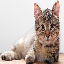

1/1 [==============================] - 0s 20ms/step
This is a cat with probablilty : 0.9047037288546562


In [47]:
predict_img_label('cat_or_dog_2.jpg')

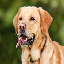

1/1 [==============================] - 0s 24ms/step
This is a DOG with probablilty : 0.9998828768730164


In [48]:
predict_img_label('cat_or_dog_1.jpg')

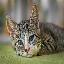

1/1 [==============================] - 0s 32ms/step
This is a cat with probablilty : 0.9995719572470989


In [49]:
predict_img_label('new_cat_1.jpg')

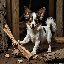

1/1 [==============================] - 0s 28ms/step
This is a DOG with probablilty : 0.5379416942596436


In [51]:
predict_img_label('new_dog_1.png')

This is an edge case because this dog actually looks like cat :)